<a href="https://colab.research.google.com/github/Saria-Alashry/Alashry/blob/master/ai_foundations_lecture1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundations of AI - Lecture 1: Linear Algebra & Statistics

This notebook covers the fundamental concepts from Lecture 1, including:

- Matrix operations
- Statistical measures (mean, median, variance, standard deviation)
- Correlation analysis

**Estimated time: 15 minutes**


## 1. Setting Up: Libraries We'll Use

We'll use the following Python libraries:

- **NumPy**: For numerical computing and matrix operations
- **SciPy**: For advanced statistical functions
- **Matplotlib**: For data visualization


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 2. Matrix Operations

### 2.1 Matrix Multiplication

Example from the lecture:


In [2]:
# Define matrices from the lecture
A = np.array([[1, 2, 3, 4],
              [2, 0, 9, 7],
              [6, 2, 1, 4]])

B = np.array([[1, 0, 7],
              [2, 2, 9],
              [3, 7, 1],
              [4, 4, 2]])

# Matrix multiplication
C = np.dot(A, B)

print("Matrix A (3x4):")
print(A)
print("\nMatrix B (4x3):")
print(B)
print("\nResult C = A × B (3x3):")
print(C)
print("\nExpected first row: [30, 41, 36]")

Matrix A (3x4):
[[1 2 3 4]
 [2 0 9 7]
 [6 2 1 4]]

Matrix B (4x3):
[[1 0 7]
 [2 2 9]
 [3 7 1]
 [4 4 2]]

Result C = A × B (3x3):
[[30 41 36]
 [57 91 37]
 [29 27 69]]

Expected first row: [30, 41, 36]


### 2.2 Matrix Determinant

The determinant tells us about area and whether a matrix is invertible.


In [3]:
# Matrix with determinant = 2 (from lecture)
A_det = np.array([[2, 0],
                  [0, 1]])

det_A = np.linalg.det(A_det)

print("Matrix A:")
print(A_det)
print(f"\nDeterminant = {det_A}")
print("\nThis represents a horizontal scaling transformation.")

Matrix A:
[[2 0]
 [0 1]]

Determinant = 2.0

This represents a horizontal scaling transformation.


### 2.3 Matrix Inverse

Example from lecture: A = [[2.0, 1.0], [0.5, 1.5]]


In [4]:
# Matrix from the lecture
A = np.array([[2.0, 1.0],
              [0.5, 1.5]])

# Calculate determinant
det_A = np.linalg.det(A)
print("Matrix A:")
print(A)
print(f"\nDeterminant = {det_A}")

# Calculate inverse
A_inv = np.linalg.inv(A)
print("\nInverse A⁻¹:")
print(A_inv)
print("\nExpected: [[0.6, -0.4], [-0.2, 0.8]]")

# Verify: A × A⁻¹ = I (identity matrix)
I = np.dot(A, A_inv)
print("\nVerification A × A⁻¹ = I:")
print(np.round(I, 10))  # Round to avoid floating point errors

Matrix A:
[[2.  1. ]
 [0.5 1.5]]

Determinant = 2.5

Inverse A⁻¹:
[[ 0.6 -0.4]
 [-0.2  0.8]]

Expected: [[0.6, -0.4], [-0.2, 0.8]]

Verification A × A⁻¹ = I:
[[ 1.  0.]
 [-0.  1.]]


## 3. Statistical Measures

### 3.1 Dataset: Height Measurements

Using the height data from the lecture (in cm):


In [5]:
# Height data from the lecture
heights = np.array([165, 178, 182, 159, 174, 188, 171, 163, 179, 176, 184, 169, 167, 173, 181])

print(f"Number of observations: {len(heights)}")
print(f"Heights (cm): {heights}")

Number of observations: 15
Heights (cm): [165 178 182 159 174 188 171 163 179 176 184 169 167 173 181]


### 3.2 Mean

The mean is the average of all values:

$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$


In [6]:
# Calculate mean
mean_height = np.mean(heights)

print(f"Mean height = {mean_height:.2f} cm")
print(f"Expected from lecture: 173.93 cm")

# Manual calculation to show the formula
manual_mean = np.sum(heights) / len(heights)
print(f"\nManual calculation: {np.sum(heights)} ÷ {len(heights)} = {manual_mean:.2f} cm")

Mean height = 173.93 cm
Expected from lecture: 173.93 cm

Manual calculation: 2609 ÷ 15 = 173.93 cm


### 3.3 Median

The median is the middle value in a sorted dataset (50th percentile).


In [8]:
# Calculate median
median_height = np.median(heights)
print("heights:", heights)
print("Sorted heights:")
sorted_heights = np.sort(heights)
print(sorted_heights)

print(f"\nMedian (middle value) = {median_height} cm")
print(f"Position: {len(heights)//2 + 1}th value in sorted list")

# For even number of elements, median is average of two middle values
# Example with 14 elements (removing one outlier)
heights_14 = np.array([26, 163, 165, 167, 169, 171, 173, 174, 176, 178, 179, 181, 182, 521])
median_14 = np.median(heights_14)
print(f"\nExample with outliers (n=14): median = {median_14} cm")
print("This is robust to outliers (26 and 521)!")

heights: [165 178 182 159 174 188 171 163 179 176 184 169 167 173 181]
Sorted heights:
[159 163 165 167 169 171 173 174 176 178 179 181 182 184 188]

Median (middle value) = 174.0 cm
Position: 8th value in sorted list

Example with outliers (n=14): median = 173.5 cm
This is robust to outliers (26 and 521)!


### 3.4 Trimmed Mean

Removes outliers by trimming extreme values:

$$\bar{x}_{trimmed} = \frac{\sum_{i=p+1}^{n-p} x_i}{n - 2p}$$


In [9]:
# Trimmed mean example from lecture
# Remove top 3 and bottom 3 values (p=3)
trimmed_mean = stats.trim_mean(heights, proportiontocut=0.2)  # 20% from each end

print(f"Regular mean: {np.mean(heights):.2f} cm")
print(f"Trimmed mean (20% trim): {trimmed_mean:.2f} cm")

# Manual calculation as shown in lecture
sorted_h = np.sort(heights)
manual_trimmed = np.mean(sorted_h[3:12])  # Remove 3 from each end
print(f"\nManual trimmed mean (lecture example): {manual_trimmed:.2f} cm")
print("Expected from lecture: 174.22 cm")

Regular mean: 173.93 cm
Trimmed mean (20% trim): 174.22 cm

Manual trimmed mean (lecture example): 174.22 cm
Expected from lecture: 174.22 cm


### 3.5 Variance and Standard Deviation

**Variance** measures spread:

$$\sigma^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$$

**Standard deviation** is the square root of variance (same scale as data):

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$$


Mean: 173.93 cm
Variance: 68.92 cm²
Standard deviation: 8.30 cm


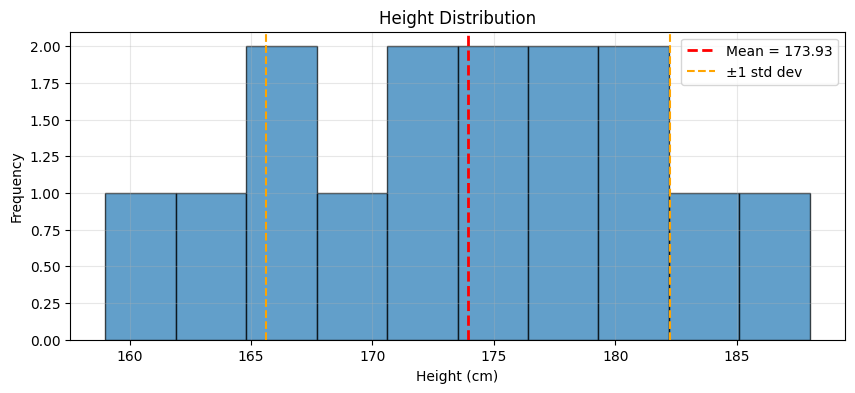

In [10]:
# Calculate variance and standard deviation
variance = np.var(heights, ddof=1)  # ddof=1 for sample variance (n-1)
std_dev = np.std(heights, ddof=1)   # ddof=1 for sample std dev

print(f"Mean: {mean_height:.2f} cm")
print(f"Variance: {variance:.2f} cm²")
print(f"Standard deviation: {std_dev:.2f} cm")

# Visualize the spread
plt.figure(figsize=(10, 4))
plt.hist(heights, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(mean_height, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_height:.2f}')
plt.axvline(mean_height - std_dev, color='orange', linestyle='--', label=f'±1 std dev')
plt.axvline(mean_height + std_dev, color='orange', linestyle='--')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Height Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. Correlation Analysis

### 4.1 Pearson Correlation

Pearson correlation measures **linear** relationships:

$$r = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}$$

Range: -1 to +1


Pearson correlation coefficient: 0.636

Interpretation:
  r = 1.0  → Perfect positive linear correlation
  r = 0.0  → No linear correlation
  r = -1.0 → Perfect negative linear correlation


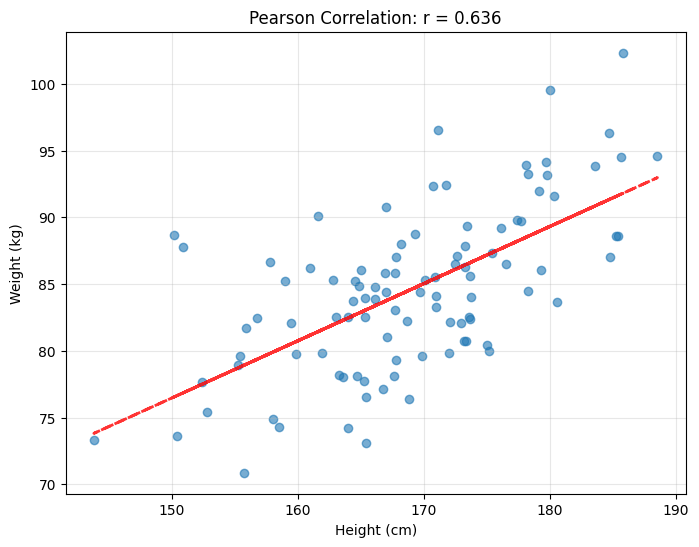

In [11]:
# Generate correlated data (height vs weight)
np.random.seed(42)
heights_data = np.random.normal(170, 10, 100)
weights_data = 0.5 * heights_data + np.random.normal(0, 5, 100)  # Linear relationship with noise

# Calculate Pearson correlation
pearson_corr, _ = stats.pearsonr(heights_data, weights_data)

print(f"Pearson correlation coefficient: {pearson_corr:.3f}")
print("\nInterpretation:")
print("  r = 1.0  → Perfect positive linear correlation")
print("  r = 0.0  → No linear correlation")
print("  r = -1.0 → Perfect negative linear correlation")

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(heights_data, weights_data, alpha=0.6)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title(f'Pearson Correlation: r = {pearson_corr:.3f}')
plt.grid(True, alpha=0.3)

# Add best fit line
z = np.polyfit(heights_data, weights_data, 1)
p = np.poly1d(z)
plt.plot(heights_data, p(heights_data), "r--", alpha=0.8, linewidth=2)
plt.show()

### 4.2 Spearman Correlation

Spearman correlation measures **monotonic** (not necessarily linear) relationships using ranks.


Pearson correlation:  0.944  (measures linear relationship)
Spearman correlation: 0.959  (measures monotonic relationship)

Spearman is better for non-linear but monotonic relationships!


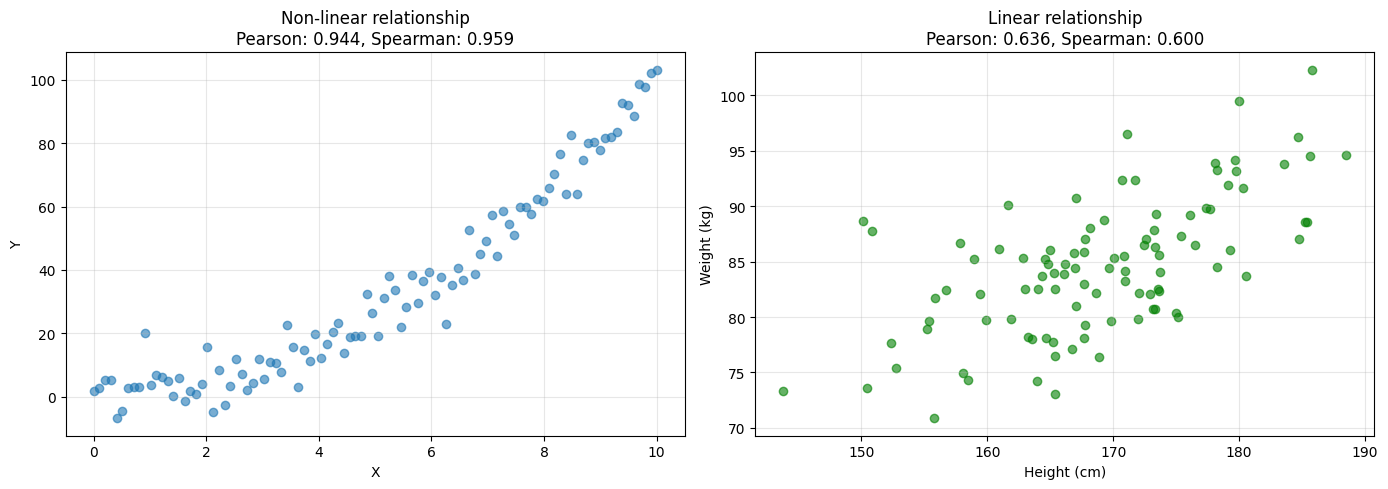

In [12]:
# Generate non-linear but monotonic relationship
x_data = np.linspace(0, 10, 100)
y_data = x_data ** 2 + np.random.normal(0, 5, 100)  # Quadratic relationship

# Calculate both correlations
pearson_corr, _ = stats.pearsonr(x_data, y_data)
spearman_corr, _ = stats.spearmanr(x_data, y_data)

print(f"Pearson correlation:  {pearson_corr:.3f}  (measures linear relationship)")
print(f"Spearman correlation: {spearman_corr:.3f}  (measures monotonic relationship)")
print("\nSpearman is better for non-linear but monotonic relationships!")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Non-linear relationship
axes[0].scatter(x_data, y_data, alpha=0.6)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title(f'Non-linear relationship\nPearson: {pearson_corr:.3f}, Spearman: {spearman_corr:.3f}')
axes[0].grid(True, alpha=0.3)

# Linear relationship for comparison
axes[1].scatter(heights_data, weights_data, alpha=0.6, color='green')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Weight (kg)')
p_lin, _ = stats.pearsonr(heights_data, weights_data)
s_lin, _ = stats.spearmanr(heights_data, weights_data)
axes[1].set_title(f'Linear relationship\nPearson: {p_lin:.3f}, Spearman: {s_lin:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 Covariance Matrix

From the lecture visualization showing perfect correlation (r = 1.00):


In [13]:
# Create perfectly correlated data
heights_perfect = np.random.normal(170, 10, 100)
weights_perfect = 0.8 * heights_perfect - 50  # Perfect linear relationship

# Calculate covariance matrix
cov_matrix = np.cov(heights_perfect, weights_perfect)

print("Covariance Matrix:")
print(cov_matrix)
print(f"\nVar(Height) = {cov_matrix[0,0]:.2f}")
print(f"Var(Weight) = {cov_matrix[1,1]:.2f}")
print(f"Cov(Height, Weight) = {cov_matrix[0,1]:.2f}")

# Calculate correlation from covariance
correlation = cov_matrix[0, 1] / (np.sqrt(cov_matrix[0, 0]) * np.sqrt(cov_matrix[1, 1]))
print(f"\nCorrelation coefficient: {correlation:.3f}")
print("Expected from lecture: r ≈ 1.00 for perfect correlation")

Covariance Matrix:
[[78.16353145 62.53082516]
 [62.53082516 50.02466013]]

Var(Height) = 78.16
Var(Weight) = 50.02
Cov(Height, Weight) = 62.53

Correlation coefficient: 1.000
Expected from lecture: r ≈ 1.00 for perfect correlation


## 5. Summary

### Key Takeaways:

**Matrix Operations:**

- Matrix multiplication for transformations
- Determinant measures scaling
- Inverse matrix: A × A⁻¹ = I

**Statistical Measures:**

- **Mean**: Average of all values
- **Median**: Middle value (robust to outliers)
- **Trimmed mean**: Removes extreme values
- **Variance**: Measures spread (squared units)
- **Standard deviation**: √variance (same units as data)

**Correlation:**

- **Pearson**: Measures linear relationships (-1 to +1)
- **Spearman**: Measures monotonic relationships (rank-based)
- **Covariance**: Unnormalized measure of joint variability

These concepts are fundamental for understanding AI and machine learning algorithms!
